In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
mpl.style.use('classic')

import baraffe_tables
from baraffe_tables.table_search import baraffe_table_search

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [2]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)


In [6]:
Minit = np.array((20.0, 14.0, 9.8, 6.9, 4.801, 3.4, 2.3, 1.6, 1.1, 0.82, 0.57, 0.4, 0.28))#, 0.2))
Minit_r240301 = np.array((20.0, 14.0, 9.8, 6.9, 4.805, 3.4, 2.3, 1.6, 1.1, 0.82, 0.57, 0.4, 0.28))#, 0.2))
Minit_r12115 = np.array((20.0, 14.0, 9.8, 6.9, 4.8, 3.4, 2.3, 1.6, 1.1, 0.82, 0.57, 0.4, 0.28, 0.2))
#Rsuccess = np.array((5.0, 5.0, 5.0, 5.0, 2.0, 2.0, 2.0, 1.5))

Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031754308958619483 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.014523274230285429 Gyr
Interpolating tables 0.050 Gyr and 0.100 Gyr to 0.05117138118883928 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.12652267789127847 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.23000981564722126 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.47760856586957595 Gyr
Interpolating tables 1.000 Gyr and 5.000 Gyr to 1.106153793001767 Gyr
Interpolating tables 1.000 Gyr and 5.000 Gyr to 2.6992562601818735 Gyr
Interpolating tables 5.000 Gyr and 10.000 Gyr to 6.77987268140815 Gyr
[4.87770986e-03 4.87770986e-03 2.93000082e-03 1.31709074e-03
 2.28744346e-04 5.32383453e-05 2.98319626e-05 7.45289528e-06
 2.53549199e-06 1.13421322e-06 2.65270078e-07 1.56431018e-07]
[2468.74366261 2468.74366261 2441.06769886 2340.68836055 1899.09342932
 1440.93979109 1293.72797584  941.51685438  733.46859474  621.40316664
  430.62776042  378.28423922

/Users/emily/Documents/astro/mypythonmods/baraffe_tables/baraffe_tables/table_search.py:402: UserWarning: Interpolated values are outside the lower bound of M/Ms.
  warnings.warn(


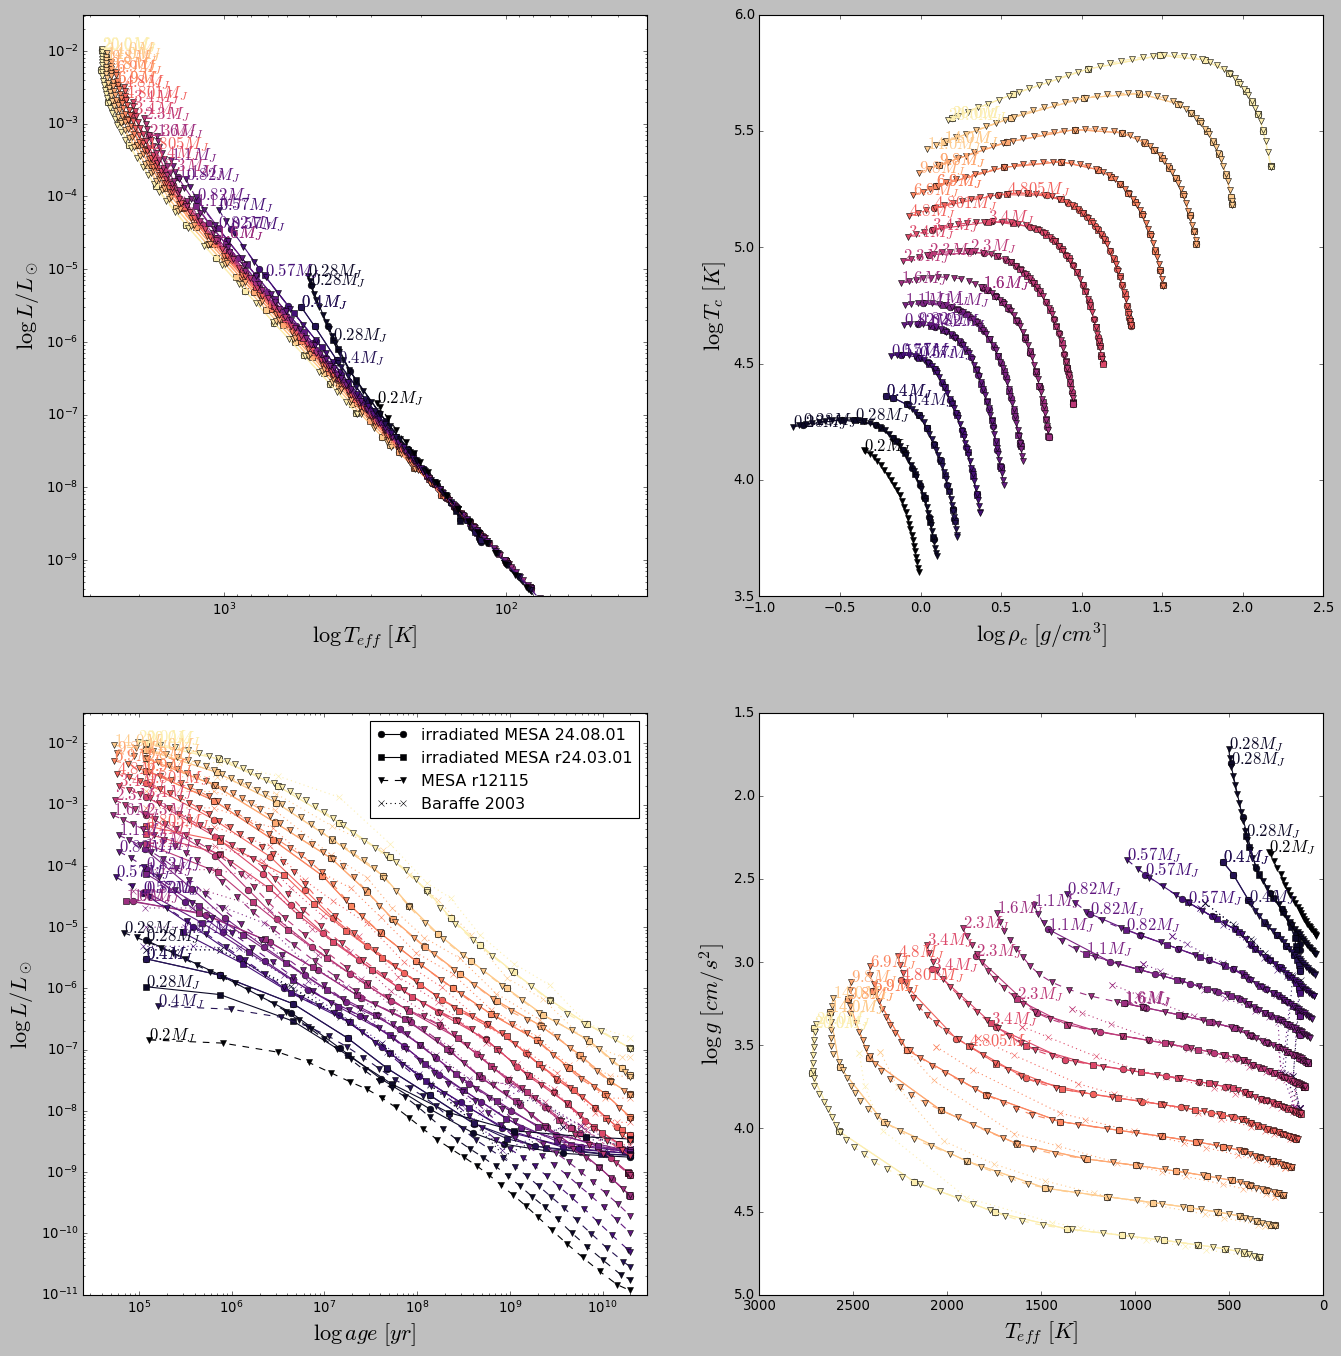

In [8]:
fig, axes = plt.subplots(2,2, figsize=(20,20))
axes[0,0].set_xlabel(r"$\log{T_{eff}}\ [K]$")
axes[0,0].set_xlim(10**3.5, 10**1.5)
axes[0,0].set_ylabel(r"$\log{L/L_\odot}$")
axes[0,0].set_ylim(10**-9.5,10**-1.5)
axes[0,0].set_xscale("log")
axes[0,0].set_yscale("log")

axes[0,1].set_xlabel(r"$\log{\rho_c}\ [g/cm^3]$")
axes[0,1].set_ylabel(r"$\log{T_c}\ [K]$")

axes[1,0].set_xlabel(r"$\log{age}\ [yr]$")
axes[1,0].set_xlim(2.5e4,3.e10)
axes[1,0].set_ylabel(r"$\log{L/L_\odot}$")
axes[1,0].set_ylim(10**-11,10**-1.5)
axes[1,0].set_xscale("log")
axes[1,0].set_yscale("log")

axes[1,1].set_xlabel(r"$T_{eff}\ [K]$")
axes[1,1].set_xlim(3000,0)
axes[1,1].set_ylabel(r"$\log{g}\ [cm/s^2]$")
axes[1,1].set_ylim(5,1.5)

for ax in np.ravel(axes):
    ax.xaxis.get_label().set_fontsize(20)
    ax.yaxis.get_label().set_fontsize(20)

cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=np.log(np.min(Minit_r12115)), vmax=np.log(np.max(Minit_r12115))+0.15)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

for m in Minit:
    colorVal = scalarMap.to_rgba(np.log(m))
    
    history = Table.read("./Minit={0}Mj/LOGS/history.data".format(m), format="ascii", header_start=4, data_start=5)
    mask = (history['star_age'] > 5.e4)
    history = history[mask]
        
    axes[0,0].plot(history['Teff'], history['luminosity'], color=colorVal,marker='o')
    axes[0,1].plot(history['log_cntr_Rho'], history['log_cntr_T'], color=colorVal,marker='o')
    axes[1,0].plot(history['star_age'], history['luminosity'], color=colorVal,marker='o')
    axes[1,1].plot(history['Teff'], history['log_g'],color=colorVal, marker='o')

    axes[0,0].text(history['Teff'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[0,1].text(history['log_cntr_Rho'][0], history['log_cntr_T'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,0].text(history['star_age'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,1].text(history['Teff'][0], history['log_g'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    
    ages = np.array(history['star_age'])
    baraffe_Ls = np.zeros_like(ages)
    baraffe_Teffs = np.zeros_like(ages)
    baraffe_loggs = np.zeros_like(ages)
    for i,age in enumerate(ages):
        row = baraffe_table_search(column="M/Ms", value=m*mJtomSun, age=age/1.e9, model="2003", age_interp=True)
        baraffe_Ls[i] = 10**row['L/Ls']
        baraffe_Teffs[i] = row['Teff']
        baraffe_loggs[i] = row['g']

    print(baraffe_Ls)
    print(baraffe_Teffs)
    axes[1,0].plot(ages, baraffe_Ls, color=colorVal, ls=":",lw=1,marker='x')
    axes[1,1].plot(baraffe_Teffs, baraffe_loggs, color=colorVal, ls=":",lw=1,marker='x')

for m in Minit_r240301:
    colorVal = scalarMap.to_rgba(np.log(m))
    
    history = Table.read("../reproducePaxton+2011fig18_r24.03.01/Minit={0}Mj/LOGS/history.data".format(m), format="ascii", header_start=4, data_start=5)
    mask = (history['star_age'] > 5.e4)
    history = history[mask]
        
    axes[0,0].plot(history['Teff'], history['luminosity'], color=colorVal,marker='s')
    axes[0,1].plot(history['log_cntr_Rho'], history['log_cntr_T'], color=colorVal,marker='s')
    axes[1,0].plot(history['star_age'], history['luminosity'], color=colorVal,marker='s')
    axes[1,1].plot(history['Teff'], history['log_g'],color=colorVal, marker='s')

    axes[0,0].text(history['Teff'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[0,1].text(history['log_cntr_Rho'][0], history['log_cntr_T'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,0].text(history['star_age'][0], history['luminosity'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,1].text(history['Teff'][0], history['log_g'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    '''
    ages = np.array(history['star_age'])
    baraffe_Ls = np.zeros_like(ages)
    baraffe_Teffs = np.zeros_like(ages)
    baraffe_loggs = np.zeros_like(ages)
    for i,age in enumerate(ages):
        row = baraffe_table_search(column="M/Ms", value=m*mJtomSun, age=age/1.e9, model="2003", age_interp=True)
        baraffe_Ls[i] = 10**row['L/Ls']
        baraffe_Teffs[i] = row['Teff']
        baraffe_loggs[i] = row['g']

    print(baraffe_Ls)
    print(baraffe_Teffs)
    axes[1,0].plot(ages, baraffe_Ls, color=colorVal, ls=":",lw=1,marker='x')
    axes[1,1].plot(baraffe_Teffs, baraffe_loggs, color=colorVal, ls=":",lw=1,marker='x')
    '''
    
for m in Minit_r12115:

    colorVal = scalarMap.to_rgba(np.log(m))
    
    history = Table.read("../reproducePaxton+2011fig18_r12115/Minit={0}Mj/LOGS/history.data".format(m), format="ascii", header_start=4, data_start=5)
    mask = (history['star_age'] > 5.e4)
    history = history[mask]
        
    axes[0,0].plot(10**history['log_Teff'], 10**history['log_L'], color=colorVal,ls="--",marker='v')
    axes[0,1].plot(history['log_cntr_Rho'], history['log_cntr_T'], color=colorVal,ls="--",marker='v')
    axes[1,0].plot(history['star_age'], 10**history['log_L'], color=colorVal,ls="--",marker='v')
    axes[1,1].plot(10**history['log_Teff'], history['log_g'],color=colorVal, ls="--",marker='v')

    axes[0,0].text(10**history['log_Teff'][0], 10**history['log_L'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[0,1].text(history['log_cntr_Rho'][0], history['log_cntr_T'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,0].text(history['star_age'][0], 10**history['log_L'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
    axes[1,1].text(10**history['log_Teff'][0], history['log_g'][0], s=r"${0} M_J$".format(m),color=colorVal,fontsize=15)
'''    
    ages = np.array(history['star_age'])
    baraffe_Ls = np.zeros_like(ages)
    baraffe_Teffs = np.zeros_like(ages)
    baraffe_loggs = np.zeros_like(ages)
    for i,age in enumerate(ages):
        row = baraffe_table_search(column="M/Ms", value=m*mJtomSun, age=age/1.e9, model="2003", age_interp=True)
        baraffe_Ls[i] = 10**row['L/Ls']
        baraffe_Teffs[i] = row['Teff']
        baraffe_loggs[i] = row['g']

    print(baraffe_Ls)
    print(baraffe_Teffs)
    axes[1,0].plot(ages, baraffe_Ls, color=colorVal, ls=":",lw=1,marker='x')
    axes[1,1].plot(baraffe_Teffs, baraffe_loggs, color=colorVal, ls=":",lw=1,marker='x')
 '''   
    
axes[1,0].plot(np.arange(3), np.arange(3), ls="-",marker='o', color=colorVal,label="irradiated MESA 24.08.01")
axes[1,0].plot(np.arange(3), np.arange(3), ls="-",marker='s', color=colorVal,label="irradiated MESA r24.03.01")
axes[1,0].plot(np.arange(3), np.arange(3), ls="--",marker='v', color=colorVal,label="MESA r12115")
axes[1,0].plot(np.arange(3), np.arange(3), ls=":",marker='x',color=colorVal, label="Baraffe 2003")
axes[1,0].legend(loc="best")
#plt.show()
plt.savefig("MESA_24.08.01_vs_MESAr24.03.01_vs_MESAr12115_vs_baraffe2003.pdf",bbox_inches="tight")
#plt.savefig("MESA_24.08.01_vs_baraffe2003.pdf",bbox_inches="tight")
    

In [12]:
# read in MESA results
history_2RJ = Table.read("./MESA_make_planets_0.01Msun/LOGS/history.data", format="ascii", header_start=4, data_start=5)
print(history.colnames)

['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'mass_conv_core', 'Teff', 'log_L', 'log_R', 'log_g', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'total_mass_h1', 'total_mass_he3', 'total_mass_he4', 'total_mass_c12', 'total_mass_n14', 'total_mass_o16', 'total_mass_ne20', 'total_mass_mg24', 'num_retries', 'num_iters', 'elapsed_time']


In [13]:
# read in MESA results
history_3RJ = Table.read("./MESA_make_planets_0.01Msun/LOGS/history.data", format="ascii", header_start=4, data_start=5)
print(history.colnames)

['model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'mass_conv_core', 'Teff', 'log_L', 'log_R', 'log_g', 'log_cntr_P', 'log_cntr_Rho', 'log_cntr_T', 'total_mass_h1', 'total_mass_he3', 'total_mass_he4', 'total_mass_c12', 'total_mass_n14', 'total_mass_o16', 'total_mass_ne20', 'total_mass_mg24', 'num_retries', 'num_iters', 'elapsed_time']


In [14]:
# search baraffe tables for 0.01 Msun object
mp_arr = np.array((0.01)) #msun
mp_arr = np.atleast_1d(mp_arr)
age_arr = 10**np.linspace(6.,10.,25)/1.e9
L_matrix = np.zeros((len(mp_arr),len(age_arr)))
Teff_matrix = np.zeros((len(mp_arr),len(age_arr)))

for i, mp in enumerate(mp_arr):
    for j, age in enumerate(age_arr):
        row = baraffe_table_search(column="M/Ms", value=mp, age=age, model="2003", age_interp=True)
        #sprint(row)
        L_matrix[i,j] = row['L/Ls']
        Teff_matrix[i,j] = row['Teff']
    

Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0014677992676220707 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0021544346900318825 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0031622776601683794 Gyr
Interpolating tables 0.001 Gyr and 0.005 Gyr to 0.0046415888336127815 Gyr
Interpolating tables 0.005 Gyr and 0.010 Gyr to 0.006812920690579608 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.014677992676220676 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.021544346900318825 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.03162277660168379 Gyr
Interpolating tables 0.010 Gyr and 0.050 Gyr to 0.046415888336127725 Gyr
Interpolating tables 0.050 Gyr and 0.100 Gyr to 0.06812920690579607 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.14677992676220677 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.21544346900318778 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.31622776601683794 Gyr
Interpolating tables 0.120 Gyr and 0.500 Gyr to 0.46

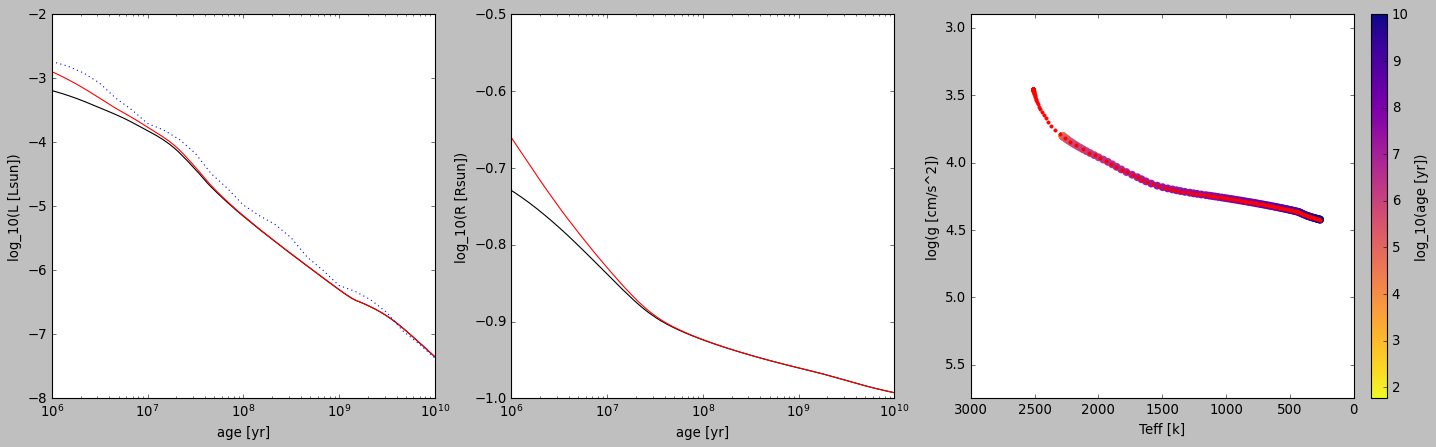

In [17]:
fig, axes = plt.subplots(1,3,figsize=(21,6))
axes[0].plot(history_2RJ['star_age'],history_2RJ['log_L'],'k-')

axes[0].plot(history_3RJ['star_age'],history_3RJ['log_L'],'r-')

for i, mp in enumerate(mp_arr):
    axes[0].plot(age_arr*1.e9, L_matrix[i], ':')
    
axes[0].set_xlabel("age [yr]")
axes[0].set_ylabel("log_10(L [Lsun])")
axes[0].set_xscale("log")
axes[0].set_xlim(1.e6,1.e10)



axes[1].plot(history_2RJ['star_age'],history_2RJ['log_R'],'k-')

axes[1].plot(history_3RJ['star_age'],history_3RJ['log_R'],'r-')

axes[1].set_xlabel("age [yr]")
axes[1].set_ylabel("log_10(R [Rsun])")
axes[1].set_xscale("log")
axes[1].set_xlim(1.e6,1.e10)

cs = axes[2].scatter(history_2RJ['Teff'],history_2RJ['log_g'],c=np.log10(history_2RJ['star_age']),marker='.',s=200,edgecolor='None',cmap='plasma_r')
axes[2].plot(history_3RJ['Teff'], history_3RJ['log_g'],'r.')
axes[2].set_xlabel("Teff [k]")
axes[2].set_ylabel("log(g [cm/s^2])")
axes[2].set_xlim(3000,0)
axes[2].set_ylim(5.75,2.9)

cax = plt.axes((0.91, 0.1, 0.01, 0.8))
plt.colorbar(cs,cax=cax,label="log_10(age [yr])")

plt.show()

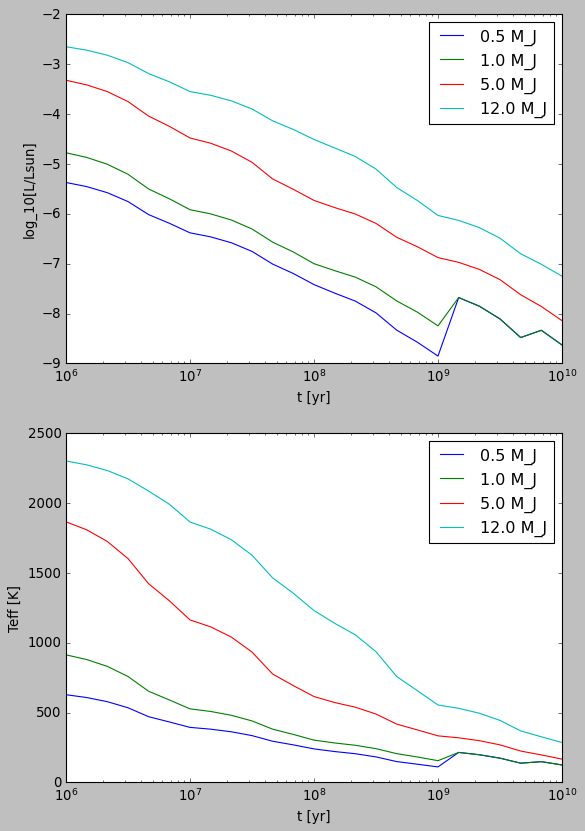

In [5]:
fig, axes = plt.subplots(2,1,figsize=(8,12))
for i, mp in enumerate(mp_arr):
    axes[0].plot(age_arr*1.e9, L_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
    axes[1].plot(age_arr*1.e9, Teff_matrix[i], '-',label="{0} M_J".format(mp/0.0009545942339693249))
axes[0].legend(loc="best")
axes[1].legend(loc="best")
axes[0].set_xscale("log")
axes[1].set_xscale("log")

axes[0].set_xlabel("t [yr]")
axes[1].set_xlabel("t [yr]")
axes[0].set_ylabel("log_10[L/Lsun]")
axes[1].set_ylabel("Teff [K]")

axes[0].set_xlim(1.e6,1.e10)
axes[1].set_xlim(1.e6,1.e10)

plt.show()